Linear: R2=0.571, RMSE=197.32
Poly (deg=2): R2=0.968, RMSE=54.25


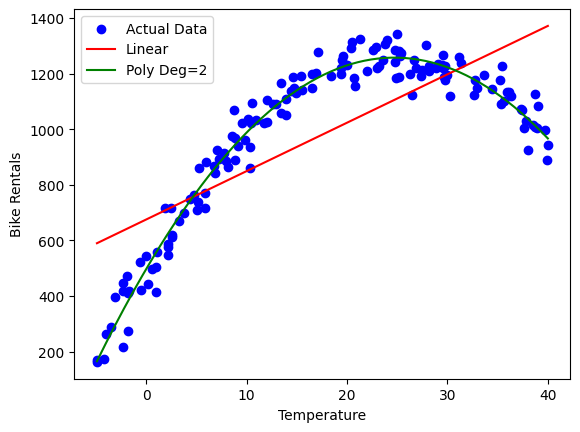

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("E:/PYTHON/DAY 5/bike_poly.csv")

X=df[['temperature']].values
y=df['rentals'].values

lin_reg=LinearRegression()
lin_reg.fit(X, y)
y_pred_lin=lin_reg.predict(X)


poly2=PolynomialFeatures(degree=2)
X_poly2=poly2.fit_transform(X)
poly2_reg=LinearRegression()
poly2_reg.fit(X_poly2, y)
y_pred_poly2=poly2_reg.predict(X_poly2)

print("Linear: R2=%.3f, RMSE=%.2f" % (r2_score(y, y_pred_lin), np.sqrt(mean_squared_error(y, y_pred_lin))))
print("Poly (deg=2): R2=%.3f, RMSE=%.2f" % (r2_score(y, y_pred_poly2), np.sqrt(mean_squared_error(y, y_pred_poly2))))

plt.scatter(X, y, color="blue", label="Actual Data")

X_range=np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
plt.plot(X_range, lin_reg.predict(X_range), color="red", label="Linear")
plt.plot(X_range, poly2_reg.predict(poly2.transform(X_range)), color="green", label="Poly Deg=2")


plt.xlabel("Temperature")
plt.ylabel("Bike Rentals")
plt.legend()
plt.show()